# PCA

**Lecture section: TC1L**

**Tutorial section: TT2L**

| | Student ID     | Student Name                        
|--:|:-------------|:------------------------------------
| 1 | 1211101888   | SHAHNAZ BINTI HUSAIN SUKRI          
| 2 | 1221303909   | MUHAMMAD UKASYAH BIN MD YUSOF           
               

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
data = pd.read_csv('customer_segmentation.csv')
data = data.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant numerical features for PCA
columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 
           'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
           'Z_CostContact', 'Z_Revenue', 'Response']

# Select the columns from the original DataFrame
X = data[columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create dataframe with principle components
pca_df = pd.DataFrame(data = principal_components
             , columns = ['PC1', 'PC2'])

# Print the explained variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
pca_df.tail()

Explained variation per principal component: [0.28443482 0.08841177]


,PC1,PC2
2211,2.375093,1.576271
2212,-0.972759,2.320948
2213,1.463802,-0.014976
2214,1.754194,1.347755
2215,-1.686762,0.661066


- The first principal component (PC1) captures the most significant variance (28.44%) in the dataset.
- The second principal component (PC2) captures an additional 8.84% of the variance.
- Together, the two principal components explain about 37.28% of the total variance. This indicates that these two components capture a significant portion of the information in the original dataset but not all of it.

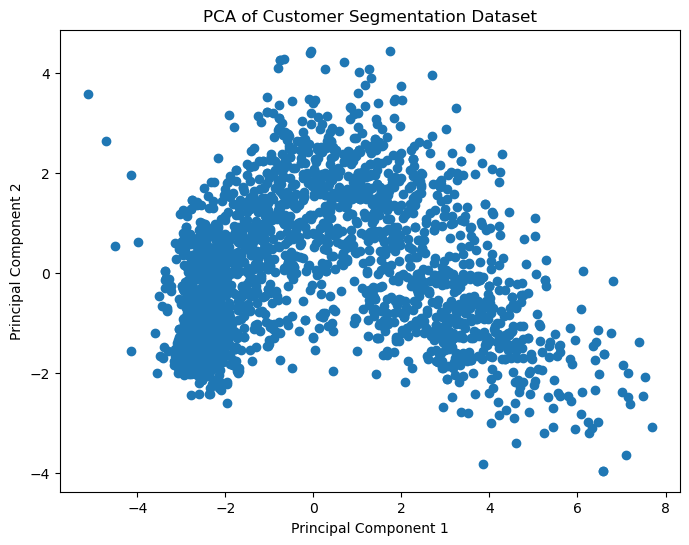

In [20]:
import matplotlib.pyplot as plt

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Segmentation Dataset')
plt.show()

- There is a dense cluster of data points around the center of the plot. This indicates that many data points have similar values along the first two principal components.
- The concentration of points suggests a central tendency, where most data points lie close to the mean of the dataset.
- The data points are spread out along both PC1 and PC2, with a significant spread along PC1.
- There are some points that lie far away from the dense cluster, indicating potential outliers or extreme values in the dataset.
- The overall shape of the point cloud suggests that the data has a continuous distribution without clear separations or distinct clusters.

### References

**Dataset Source:** [Customer Segmentation](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering)
